# Task1 
### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TejasSutar01/AIRLINES_KMEANS_CLUSTERING/master/EastWestAirlines.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.shape

(3999, 12)

In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [7]:
df['cc1_miles'].unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


# EDA

## Balance Column
## Detection of outliers

In [9]:
# Detection of outliers
Q1 = df['Balance'].quantile(q = 0.25)
Q3 = df['Balance'].quantile(q = 0.75)
L_QUARTILE = Q1 - 1.5*(Q3-Q1)
U_QUARTILE = Q1 + 1.5*(Q3-Q1)
print('Lower Quartile Value: ', L_QUARTILE)
print('Upper Quartile Value: ',U_QUARTILE)

Lower Quartile Value:  -92287.25
Upper Quartile Value:  129342.25


In [10]:
print('Number of outliers in Balance upper : ', df[df['Balance']>129342.25]['Balance'].count())
print('Number of outliers in Balance lower : ', df[df['Balance']<-92287.25]['Balance'].count())
print('Percentage of outliers in Balance upper: ',round(df[df['Balance'] > 129342.25]['Balance'].count() * 100 / len(df)) , '%')

Number of outliers in Balance upper :  624
Number of outliers in Balance lower :  0
Percentage of outliers in Balance upper:  16 %


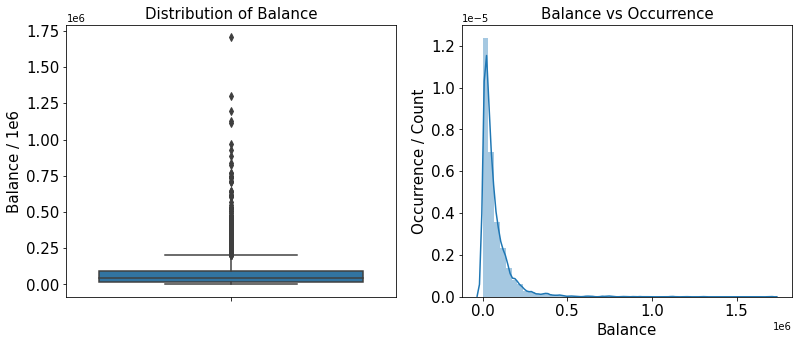

In [11]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='Balance',data= df,orient='v',ax=ax1)
ax1.set_ylabel('Balance / 1e6', fontsize=15)
ax1.set_title('Distribution of Balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence / Count', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

## Checking behaviour of Qual Miles column

Text(0, 0.5, 'No. of instances')

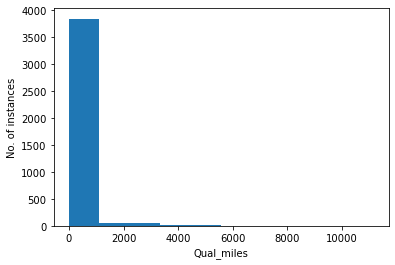

In [12]:
plt.hist(df['Qual_miles'])
plt.xlabel('Qual_miles')
plt.ylabel('No. of instances')

## Behaviour of cc_miles

Text(0.5, 1.0, 'Countplot of CC3_miles')

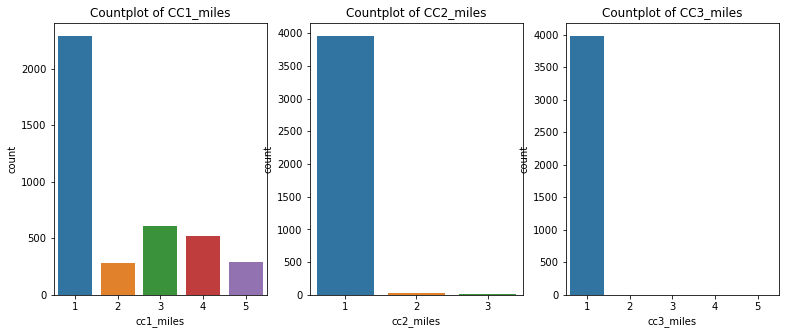

In [13]:
fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (13,5))
sns.countplot(df['cc1_miles'] , orient = 'v' , ax = ax1)
ax1.set_title('Countplot of CC1_miles')

sns.countplot(df['cc2_miles'] , orient = 'v' , ax = ax2)
ax2.set_title('Countplot of CC2_miles')

sns.countplot(df['cc3_miles'] , orient = 'v' , ax = ax3)
ax3.set_title('Countplot of CC3_miles')

## Behaviour of Bonus miles

In [14]:
# Detection of outliers
Q1 = df['Bonus_miles'].quantile(q = 0.25)
Q3 = df['Bonus_miles'].quantile(q = 0.75)
L_QUARTILE = Q1 - 1.5*(Q3-Q1)
U_QUARTILE = Q1 + 1.5*(Q3-Q1)
print('Lower Quartile Value: ', L_QUARTILE)
print('Upper Quartile Value: ',U_QUARTILE)

Lower Quartile Value:  -32575.75
Upper Quartile Value:  35075.75


In [15]:
print('Number of outliers in Bonus_miles upper : ', df[df['Bonus_miles']>35075.75]['Bonus_miles'].count())
print('Number of outliers in Bonus_miles lower : ', df[df['Bonus_miles']<-32575.75]['Bonus_miles'].count())
print('Percentage of outliers in Bonus_miles upper: ',round(df[df['Bonus_miles'] > 35075.75]['Bonus_miles'].count() * 100 / len(df)) , '%')

Number of outliers in Bonus_miles upper :  670
Number of outliers in Bonus_miles lower :  0
Percentage of outliers in Bonus_miles upper:  17 %


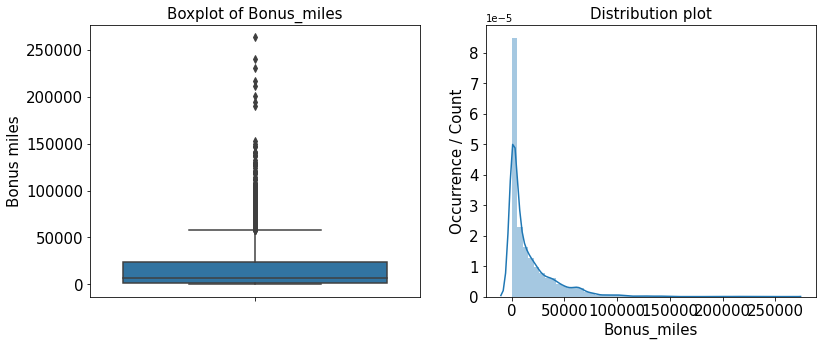

In [16]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='Bonus_miles',data= df,orient='v',ax=ax1)
ax1.set_ylabel('Bonus miles', fontsize=15)
ax1.set_title('Boxplot of Bonus_miles', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Bonus_miles'],ax=ax2)
ax2.set_xlabel('Bonus_miles', fontsize=15)
ax2.set_ylabel('Occurrence / Count', fontsize=15)
ax2.set_title('Distribution plot', fontsize=15)
ax2.tick_params(labelsize=15)

## No.of bonus transactions vs miles earned

Text(0.5, 1.0, 'No.of bonus transactions vs miles earned')

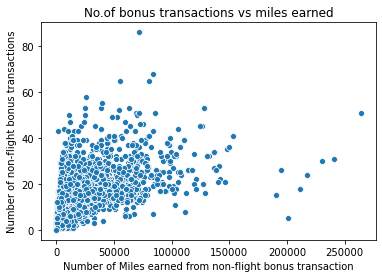

In [17]:
sns.scatterplot(x = df['Bonus_miles'] , y = df['Bonus_trans'])
plt.xlabel('Number of Miles earned from non-flight bonus transaction')
plt.ylabel('Number of non-flight bonus transactions')
plt.title('No.of bonus transactions vs miles earned')

## Relationship between Flight miles and Bonus miles

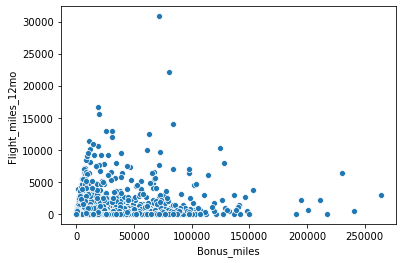

In [18]:
sns.scatterplot(df['Bonus_miles'] , df['Flight_miles_12mo'])

## Correlation Matrix

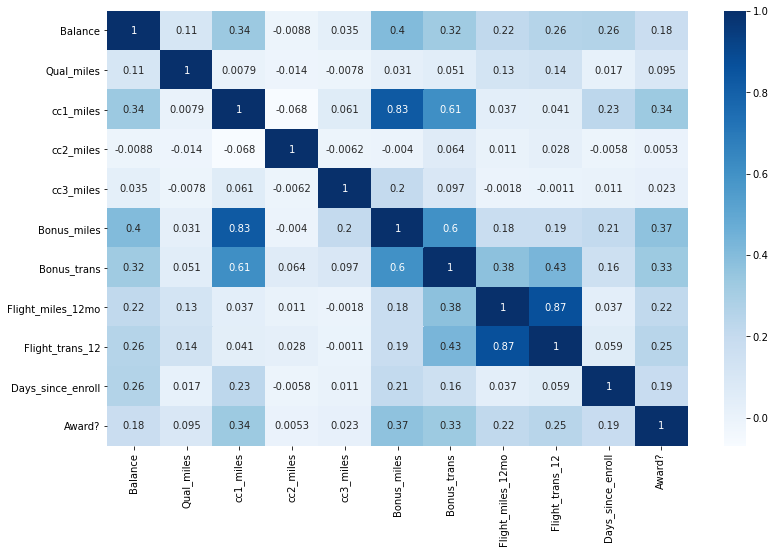

In [19]:
plt.figure(figsize = (13,8))
df2 = df.drop(['ID#'], axis = 1)
sns.heatmap(df2.corr() ,annot = True , cmap = 'Blues')

# Data Preprocessing

In [20]:
sc = StandardScaler()

In [21]:
df2 = sc.fit_transform(df.iloc[:,1:])

# Clustering

## K-Means Clustering

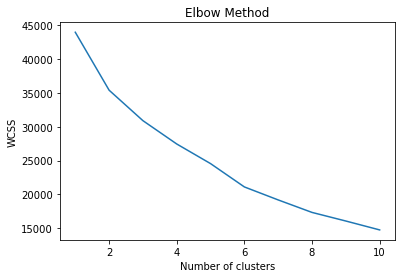

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
clusters_new = KMeans(6, random_state=0)
clusters_new.fit(df2)

KMeans(n_clusters=6, random_state=0)

In [24]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [25]:
df3 = df.drop(['ID#'] , axis = 1)

In [26]:
df3['K-Means Clusters'] = clusters_new.labels_

In [27]:
df3.groupby('K-Means Clusters').mean().T

K-Means Clusters,0,1,2,3,4,5
Balance,188155.664336,117176.916331,43882.372895,68876.581395,138061.400000,119660.491803
Qual_miles,464.573427,58.446500,43.558140,23.255814,78.800000,5351.065574
cc1_miles,2.244755,3.720837,1.229751,1.139535,3.466667,2.000000
cc2_miles,1.000000,1.000000,1.000000,2.348837,1.000000,1.000000
cc3_miles,1.000000,1.001609,1.000401,1.000000,4.066667,1.000000
Bonus_miles,32995.580420,39485.872084,4644.210104,14689.837209,93927.866667,18683.475410
Bonus_trans,27.979021,18.811746,6.852847,17.534884,28.066667,12.229508
Flight_miles_12mo,5739.692308,346.617860,199.160385,582.627907,506.666667,963.639344
Flight_trans_12,16.552448,1.032180,0.621091,2.209302,1.600000,2.868852
Days_since_enroll,4679.251748,4887.485921,3706.378508,3968.930233,4613.866667,3971.491803


In [28]:
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(df2)

KMeans(n_clusters=3, random_state=0)

In [29]:
df3['K-Means Clusters'] = clusters_new.labels_

In [30]:
x = df.iloc[: , 1:].values

In [31]:
df3.groupby('K-Means Clusters').mean().T

K-Means Clusters,0,1,2
Balance,44370.730307,117627.582671,195200.231707
Qual_miles,96.720605,157.884738,783.207317
cc1_miles,1.237097,3.732114,2.152439
cc2_miles,1.019014,1.002385,1.036585
cc3_miles,1.000388,1.038156,1.000000
Bonus_miles,4837.902212,40499.723370,31379.963415
Bonus_trans,7.015134,18.991256,26.993902
Flight_miles_12mo,200.463718,346.263911,5412.000000
Flight_trans_12,0.625534,1.025437,15.798780
Days_since_enroll,3707.357004,4883.024642,4715.945122


Text(0.5, 1.0, 'Murder rate vs Assault rate')

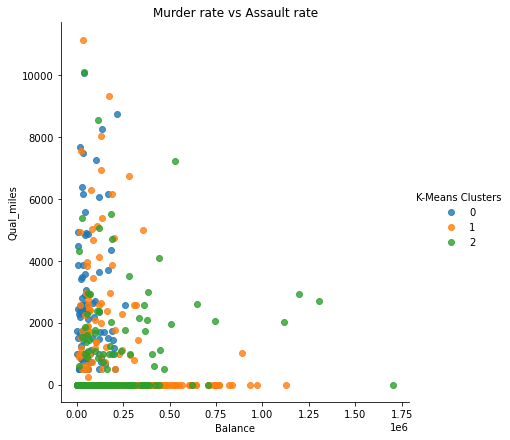

In [62]:
# Plot between pairs Balance-QualMiles
sns.lmplot( 'Balance', 'Qual_miles' ,data= df3, hue = 'K-Means Clusters', fit_reg=False, size = 6)
plt.title('Murder rate vs Assault rate')

# Inferences

## Heirarchical Clustering

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms = MinMaxScaler()

In [34]:
df_norm = mms.fit_transform(df.drop(['ID#'], axis = 1))

In [35]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')


In [36]:
y_hc = hc.fit_predict(df_norm)
hc.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [37]:
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [38]:
df3['Heirarchical Clusters'] = y_hc

In [39]:
df3.drop(['K-Means Clusters'], axis = 1).groupby('Heirarchical Clusters').mean().T

Heirarchical Clusters,0,1,2
Balance,97010.442568,59807.839555,160114.0
Qual_miles,240.020946,87.602462,500.0
cc1_miles,2.662838,1.705322,1.0
cc2_miles,1.015541,1.013900,1.0
cc3_miles,1.018243,1.008737,1.0
Bonus_miles,28876.327703,10227.689039,71954.0
Bonus_trans,15.735135,9.142971,86.0
Flight_miles_12mo,837.258108,226.292295,30817.0
Flight_trans_12,2.565541,0.652502,53.0
Days_since_enroll,4627.259459,3820.652105,1373.0


# Inferences

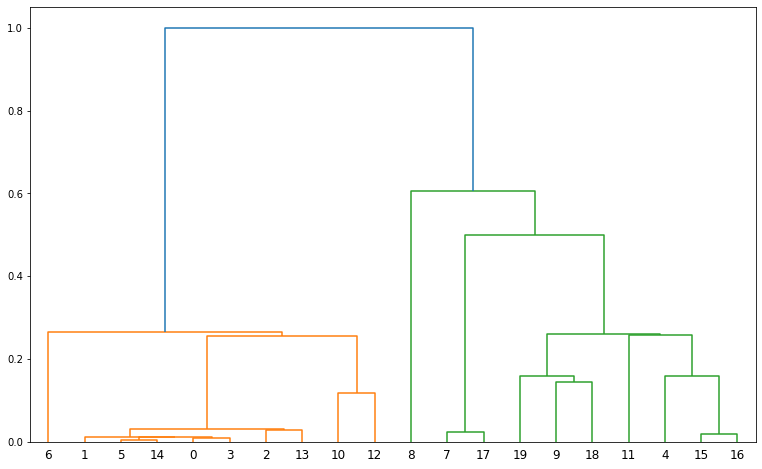

In [59]:
# DENDROGRAM FOR FIRST 20 ROWS
plt.figure(figsize = (13,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm[:20], method='single'))

Text(0.5, 1.0, 'Murder rate vs Assault rate')

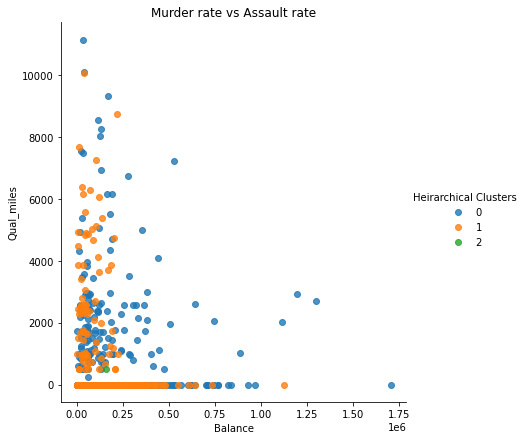

In [63]:
# Plot between pairs Balance-QualMiles
sns.lmplot( 'Balance', 'Qual_miles' ,data= df3, hue = 'Heirarchical Clusters', fit_reg=False, size = 6)
plt.title('Murder rate vs Assault rate')

## DBSCAN 

In [41]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(df2)

DBSCAN(eps=0.8, min_samples=10)

In [42]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
df3['DBSCAN clusters'] = dbscan.labels_

In [44]:
# changing values of DBSCAN labels as thdf3['DBSCAN clusters'] = dbscan.labels_ey were starting from -1
df3['DBSCAN clusters'] = df3['DBSCAN clusters'].replace({-1:0 , 0:1 , 1:2 , 2:3})

In [50]:
df4 = df3.drop(['K-Means Clusters'] , axis = 1)
df4.drop(['Heirarchical Clusters'] , axis = 1).groupby('DBSCAN clusters').mean().T

DBSCAN clusters,0,1,2,3
Balance,155680.070175,48626.946862,51173.156250,43464.000
Qual_miles,628.085526,0.687128,2.232143,0.000
cc1_miles,2.657895,1.609711,2.520089,5.000
cc2_miles,1.063596,1.000000,1.000000,1.000
cc3_miles,1.053728,1.000000,1.000000,1.000
Bonus_miles,34781.430921,8217.709574,20560.545759,60008.250
Bonus_trans,19.776316,7.972057,12.072545,17.500
Flight_miles_12mo,1664.748904,81.633532,159.716518,25.000
Flight_trans_12,4.808114,0.282180,0.546875,0.250
Days_since_enroll,4622.701754,3771.464040,4464.292411,2637.875


# Inferences

Text(0.5, 1.0, 'Murder rate vs Assault rate')

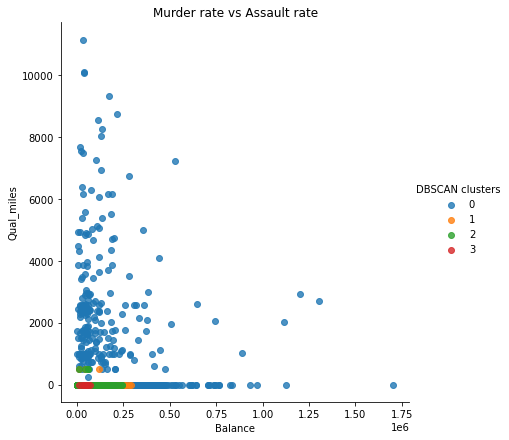

In [64]:
# Plot between pairs Balance-QualMiles
sns.lmplot( 'Balance', 'Qual_miles' ,data= df4, hue = 'DBSCAN clusters', fit_reg=False, size = 6)
plt.title('Murder rate vs Assault rate')